# Learning curve

by Linh Van Nguyen <contact@linhvannguyen.com>

as a part of the demonstration galeries for <a href='http://scikit-learn.org/stable/'>sklearn</a> Machine Learning python package.

------------
The performance of a particular model is highly sensitive to the size of the dataset. The question is, how much data is enough? To answer this question, one should always start by ploting the learning curve, i.e. the error curves on training and cross-validation data for different size of training data. 

This notebook includes:
- <a href='#part1'>Part 1: Learning curve</a>
- <a href='#part2'>Part 2: Learning curve for regression</a>
- <a href='#part3'>Part 3: Learning curve for classification</a>

## Part 1: Learning curve <a id='part1'></a>

*sklearn* provides with a very convinient function for model selection, the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html">sklearn.learning_curve.learning_curve </a> function. It determines cross-validated training and test scores for different training set sizes.
A cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. Afterwards, the scores will be averaged over all k runs for each training subset size.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, plt, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    plt : current matplotlib plot

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Number of training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, 
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.grid()
    plt.legend(loc="best")
    return plt

### Estimating learning curves
We will plot the learning curves of either regression or classification problems. The whole dataset will be virtually divided into 2 subsets: training set (say, 80%) and testing set (20%). This is done by function *cross_validation.ShuffleSplit*, with *n_iter* iterations. The function *sklearn.learning_curve.learning_curve* will do the following tasks:
* for tick = 1: n_ticks
    * for iter = 1: n_iter
        * Train the model from a portion of *train_sizes* of the training set (for example 0.1 for 10% the training data)
        * Use the trained model to perform prediction in the testing set and return scores of training and testing data
    * Plot the mean and std of scores for training and testing set
    
Scores are defined as follows:
* Classification: score is the mean successful classification rate.

* Regression: scores are defined as the coefficient of determination $R^2$ of the prediction: 

$$R^2=(1 - u/v)$$ 

where u is the regression sum of squares $\sum(y^{true} - y^{pred}) ^2$ and v is the residual sum of squares $\sum(y^{true} - \frac{1}{N}\sum{y^{true}})^2)$. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a score $R^2=0.0$.

## Part 2: Learning curve for regression <a id='part2'></a>

### Dataset
Data come from a study published by Stamey et al. (1989). This study aims at the prediction of the level of prostate specific antigen, denoted by lpsa below, from the results of clinical exams. These exams are carried out before a possible prostatectomy.

The measurements are log cancer volume *lcavol* , log prostate weight *lweight* , age of the patient *age* , log of benign prostatic hyperplasia amount *lbph* , seminal vesicle invasion *svi* , log of capsular penetration *lcp* , Gleason score *gleason* , and percent of Gleason scores 4 or 5 *pgg45* . The variables *svi* and *gleason* are categorical, others are quantitative. There are D=8 entries.

More details can be found in the other note (<a href="http://nbviewer.jupyter.org/github/linhvannguyen/sklearn_galeries/blob/master/LinearRegression.ipynb">Linear Regression</a>). From the Subset selection via Rejection, we take only 4 significant features for constructing the model.

In [3]:
import numpy.linalg as lin
# Read the data
data_init = np.loadtxt('./data/prostate_data_sansheader.txt')
nrows = np.shape(data_init)[0]
ncols = np.shape(data_init)[1]

data = data_init[:,1:11]   # get rid first column and take from 2nd to 11th columns

N = np.shape(data)[0]
D = 8 # dimension of the data
ids=[0,1,3,4]
#ids=range(0,D)
X = data[:,ids]
t = data[:,D]

We use *cross_validation.ShuffleSplit* to virtually divide the data into training data (70%) and testing data (30%). Ordinary Least-square regression is used via *linear_model.LinearRegression*. Various training data sizes are virtually selected from 70% the given dataset.

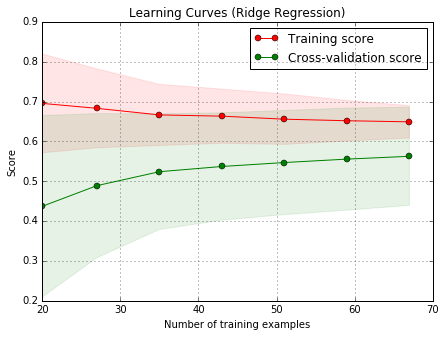

In [5]:
from sklearn import linear_model
from sklearn import cross_validation
cv = cross_validation.ShuffleSplit(N, n_iter=200, test_size=0.3, random_state=0)
estimator = linear_model.LinearRegression(fit_intercept=True, n_jobs=1, normalize=True)

plt.figure(figsize=(7, 5))
plt.title("Learning Curves (Ridge Regression)")
plot_learning_curve(estimator, plt, X, t, cv=cv, n_jobs=4,train_sizes=np.linspace(.3, 1.0, 7))
plt.show()

#### Comments:

* In general, the training score is high at the beginning and decreases when the data size increases. The reverse trend is obsered for the cross-validation score.
* By observing the learning curve, it seems worth to collect more data for training.
* Quite low scores are observed for both training and cross-validation, implying that it is worth to invest on building more sotificasted models.

## Part 3: Learning curve for classification <a id='part3'></a>

Follows are examples of learning curves for 3 classifiers: *Gaussian naive*, *Logistic Regression* and *Support Vector Classification*.

### Dataset: hand-written digits 

This dataset is made up of 1797 [8x8] images. Each image, like the one shown below, is of a hand-written digit. The task of different classifiers is to classify which number each image corresponds to. 

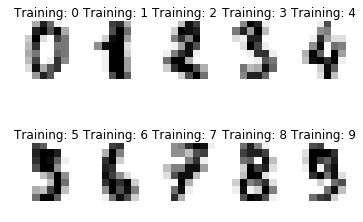

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

#### Gaussian Naive

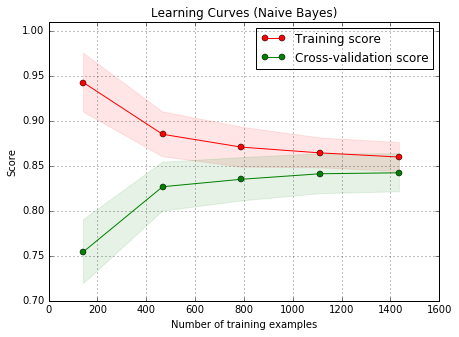

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100, test_size=0.2, random_state=0)
estimator = GaussianNB()

plt.figure(figsize=(7, 5))
plt.title("Learning Curves (Naive Bayes)")
plot_learning_curve(estimator, plt, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

#### Logistic Regression (Averaged Stochastic Gradient Descent solver)

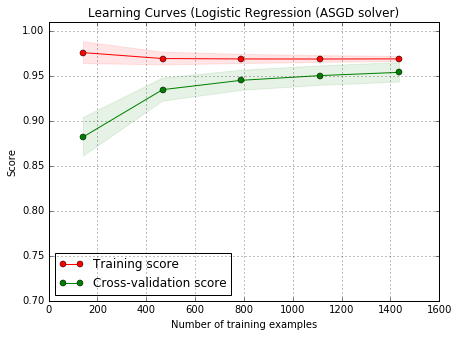

In [6]:
from sklearn.linear_model import SGDClassifier
# SVC is more expensive so we do a lower number of CV iterations:
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100, test_size=0.2, random_state=0)

estimator = SGDClassifier(loss='log',average=True)
plt.figure(figsize=(7, 5))
plt.title("Learning Curves (Logistic Regression (ASGD solver)")
plot_learning_curve(estimator, plt, X, y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

#### Support Vector Classification

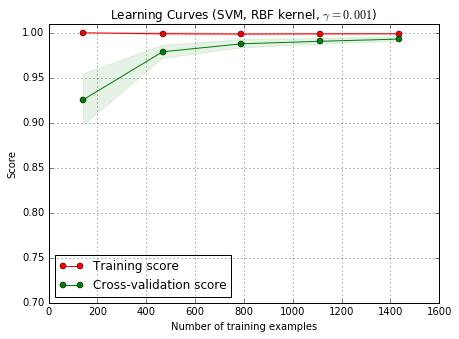

In [7]:
from sklearn.svm import SVC

# SVC is more expensive so we do a lower number of CV iterations:
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10, test_size=0.2, random_state=0)

estimator = SVC(gamma=0.001)
plt.figure(figsize=(7, 5))
plt.title("Learning Curves (SVM, RBF kernel, $\gamma=0.001$)")
plot_learning_curve(estimator, plt, X, y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

#### Comments:

* It is showing for all the three classifiers that the larger set of training data gives the smaller prediction error. 
* In general, for more complex problem, it is very often that the training score is very high at the beginning and decreases and the cross-validation score is very low at the beginning and increases
* By observing the learning curve, one can decide also whether it is worth to collect more data for training or not.